In [1]:
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings

warnings.filterwarnings("ignore")

# AppVoCAI Data Quality Analysis
In this section, we evaluate the overall quality of the AppVoCAI dataset across key dimensions: **completeness**, **validity**, **relevance**, **uniqueness**, and **data privacy**. Our analysis unfolds over the following three subsections.

1. **Data Quality Scoring Framework**: We establish a methodology for quantifying data quality by integrating these dimensions into an overall quality score.
3. **Data Quality Analysis**: We examine overall data quality provide a detailed breakdown of each data quality dimension, highlighting strengths and areas for improvement.
3. **Data Cleaning Implications**: We translate the insights from the quality assessment into actionable requirements for the data cleaning stage.

This structured approach ensures that the AppVoCAI dataset is primed for downstream aspect-based sentiment analysis.

## Data Quality Scoring Framework
Integrating aspects of **completeness**, **validity**, **relevance**, **uniqueness**, and **privacy and compliance**, our composite **Quality Score** is computed as follows:

$$
\text{Quality Score} = w_c \times X_{\text{Completeness}} + w_v \times X_{\text{Validity}} + w_r \times X_{\text{Relevance}} + w_u \times X_{\text{Uniqueness}} + w_p \times X_{\text{Data Privacy}}
$$

and our weights are as follows:

| Dimension    | Variable | Weight | Rationale                                                                                      |
|--------------|----------|--------|------------------------------------------------------------------------------------------------|
| Completeness | $w_c$    | 0.25   | Ensures the dataset is representative and balanced, critical for unbiased   model training.    |
| Validity     | $w_v$    | 0.25   | Guarantees the data conforms to expected formats and patterns, ensuring   reliable processing. |
| Relevance    | $w_r$    | 0.2    | Ensures all text is English to prevent noise and confusion from   multilingual data.           |
| Uniqueness   | $w_u$    | 0.15   | Removes duplicates to avoid overfitting and biased weightage toward   repeated samples.        |
| Privacy      | $w_p$    | 0.15   | Ensures no PII, avoiding ethical and legal risks while maintaining   dataset integrity.        |


### Completeness
We evaluate **completeness** as the degree to which the dataset is representative, and contains all required data values. Our composite score is a weighted average of **Row Completeness**, **Category Class Balance**, and **Sentiment Class Balance**.

$$
\text{Completeness Score} = w_r \times X_{\text{Row Completeness}} + w_c \times X_{\text{Category Class Balance}} + w_s \times X_{\text{Sentiment Class Balance}}
$$

where the weights are assigned as follows:

| Component               | Variable | Weight | Rationale                                                                 |
|-------------------------|----------|--------|---------------------------------------------------------------------------|
| Row Completeness        | $w_r$    | 0.5    | Ensuring rows are complete is foundational to data quality and usability. |
| Category Class Balance  | $w_c$    | 0.25   | Category balance ensures fair representation across different categories. |
| Sentiment Class Balance | $w_s$    | 0.25   | Sentiment balance avoids bias and ensures equitable model training.       |

Each component is defined as follows:

#### Row Completeness
Row completeness is the number of complete rows $N_c$ normalized by the number of rows in the dataset $N$.

$$\text{Row Completeness} = \frac{N_c}{N}$$

#### Category Class Balance
We define category class balance in terms of the deviation of record counts in each category from the average of record counts in each category. 
$$\text{Category Class Balance} = 1-\frac{\displaystyle\sum_{i=1}^C{|n_i-\bar{n_c}|}}{2\times{N}}$$

where:
- $C$ is the number of categories,
- $N$ is the number of observations in the dataset,
- $n_i$ is the number of observations in category $i$, and 
- $\bar{n_c} = \frac{\displaystyle\sum_{i=1}^C n_i}{C}$ is the average of the number of rows in each category,

#### Sentiment Class Balance 
Sentiment class balance reflects representation of sentiment classes relative to the average number of observations for each sentiment class. 
$$\text{Sentiment Class Balance} = 1-\frac{\displaystyle\sum_{i=1}^S{|n_i-\bar{n_s}|}}{2\times{N}}$$

where:
- $S$ is the number of sentiment classes,
- $N$ is the number of observations in the dataset,
- $n_i$ is the number of observations assigned sentiment $i$, and 
- $\bar{n_s} = \frac{\displaystyle\sum_{i=1}^S n_i}{S}$ is the average of the number of rows in each sentiment class

### Validity
**Validity** refers to the degree to which the data complies with pre-defined business rules, such as valid values, patterns, ranges, and types. Concretely, we define validity in terms of:

 - **Ratings**: Valid ratings are integers in [1,5]
 - **Category**:  The dataset categories are among the 14 valid categories included in this study.
 - **Review Date**: Review dates should be between January 1, 2020, and September of 2023. 
 - **Review Text**: Valid review text is free of:
    - control, HTML, accented, and diacritic characters, 
    - excessive special characters that comprise greater than 0.3 of all characters in a review,
    - excessive sequence, word and phrase repetition 
 
Integrating these components, we define validity score as follows:

$$\text{Validity Score} = w_r \times{\frac{N_r}{N}} + w_c \times{\frac{N_c}{N}}+ w_d \times{\frac{N_d}{N}}+ w_t \times{\frac{N_t}{N}}$$  

where:
- $N_r$ are the number of rows with valid ratings, 
- $N_c$ are the observations with valid categories, 
- $N_d$ indicates review dates in range, 
- $N_t$ is the count of rows that pass the text data quality anomaly detection checks, and
- $N$ is the number of observations in the dataset.

Weights for each of the components are:

| Dimension   | Variable | Weight | Rationale                                                                                         |
|-------------|----------|--------|---------------------------------------------------------------------------------------------------|
| Review Text | $w_t$    | 0.6    | Critical to NLP tasks; central to downstream model performance and requires complex validation. |
| Ratings     | $w_r$    | 0.2    | Ensures valid supervised labels but less impactful than text validity.                            |
| Category    | $w_c$    | 0.1    | Filters to relevant dataset categories; errors here may be less frequent or impactful.          |
| Review Date | $w_d$    | 0.1    | Ensures review dates are in expected range, but has minimal impact on NLP tasks.             |

The weights reflect the importance of review text quality in the overall validity score. 

### Relevance
**Relevance** is the degree to which specific data points or sets of data aligns with the intended purpose or business need, essentially indicating whether the data is meaningful and useful for the analysis at hand. For our analysis, we define relevance in terms of:

 - **Language**: Are the data free of non-English text in app names and reviews. 
 - **Review Length**: Aspect-based sentiment analysis requires an aspect and an opinion word. Single word reviews have questionable relevance to the task.

Our relevance score is computed as:
$$\text{Relevance Score} = w_e \times{\frac{N_e}{N}} + w_l \times{\frac{N_l}{N}}$$  

where:
- $N$ is the number of observations in the dataset,
- $N_e$ are the number of rows containing English language `app_name`s  and review `content`,
- $N_l$ are the number of reviews of length 2 or greater,

and the weights are:

| Measure       | Variable | Weight | Rationale                                                                                    |
|---------------|----------|--------|----------------------------------------------------------------------------------------------|
| Language      | $w_e$    | 0.4    | Non-English text is irrelevant and can degrade model performance.                            |
| Review Length | $w_l$    | 0.6    | ABSA requires an aspect and an opinion, so overly short reviews are inherently irrelevant. |


### Uniqueness
We evaluate uniquness in terms of: 
- **Row Uniqueness**: The degree to which rows are unique, 
- **Review Id Uniqueness**: Indicates uniqueness of review `id`s.
- **Review Uniqueness**: The degree of uniqueness considering `app_id`, `author`, and review `content`. 

Combining these components, we compute **Uniqueness Score** as:

$$\text{Uniqueness Score} = w_u \times{\frac{N_u}{N}} + w_i \times{\frac{N_i}{N}}+ w_r \times{\frac{N_r}{N}}$$  

where:
- $N$ is the number of observations in the dataset,
- $N_u$ is the number of unique rows, 
- $N_i$ is the number of rows with unique review `id`s, 
- $N_r$ is the number of unique reviews in terms of `app_id`, `author`, and review `content`.


and the weights are defined as:

| Criterion            | Variable | Weight | Rationale                                                                                       |
|----------------------|----------|--------|-------------------------------------------------------------------------------------------------|
| Row Uniqueness       | $w_u$    | 0.3    | Ensures no exact duplicate rows, critical for data cleanliness and   avoiding redundancy.       |
| Review Id Uniqueness | $w_i$    | 0.2    | Tracks unique reviews via IDs, useful but less critical than content   uniqueness.              |
| Review Uniqueness    | $w_r$    | 0.5    | Avoids duplicate reviews based on app_id, author, and content, ensuring   quality for analysis. |


### Data Privacy
Personally Identifiable Information (PII) in datasets raises a number of ethical, privacy, and legal concerns. Here, we measure the degree to which the data are free of PII such as URLs, phone numbers, and email addresses. 
$$\text{Data Privacy}=1-\frac{N_p}{N}$$

where:
- $N_p$ are the number of observations containing PII, 
- $N$ is the number of observations in the dataset.

.

## Data Quality Analysis

In [2]:
import pandas as pd
from discover.app.dqa import DQA
from discover.container import DiscoverContainer
from discover.core.data_structure import DataFrameType
from discover.assets.idgen import AssetIDGen
from discover.core.flow import PhaseDef, StageDef


pd.options.display.max_colwidth = 200
pd.options.display.max_columns = None

### Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()

### Load Data

In [4]:
asset_id = AssetIDGen.get_asset_id(
    asset_type="dataset", phase=PhaseDef.DATAPREP, stage=StageDef.DQD, name="review"
)
repo = container.repo.dataset_repo()
df = repo.get(
    asset_id=asset_id, dataframe_type=DataFrameType.from_identifier(identifier="pandas")
).content

### Data Quality Score

In [5]:
dqa = DQA(df=df)

,Dimension,Score
0,Completeness,0.901854
1,Validity,0.891626
2,Relevance,0.941730
3,Uniqueness,1.000000
4,Privacy,0.977509


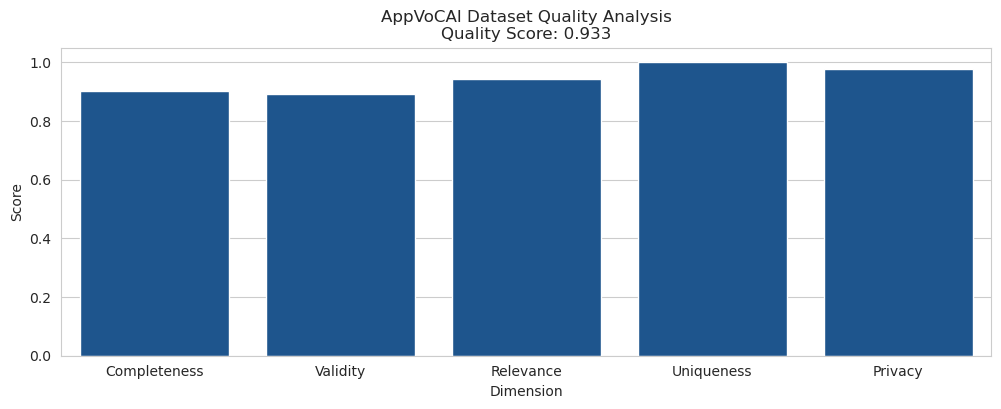

In [6]:
dqa.analyze_quality()

 While **completeness**, **relevance**, **uniqueness**, and **privacy** are strong, the **validity** dimension shows notable gaps. In the context of review text, this likely reflects issues such as noise introduced by control characters, excessive special characters, elongated text, non-ASCII content, accents, or embedded HTML. 

### Data Completeness

,Component,Score
0,Row Completeness,0.976701
1,Category Balance,0.794612
2,Sentiment Balance,0.859400


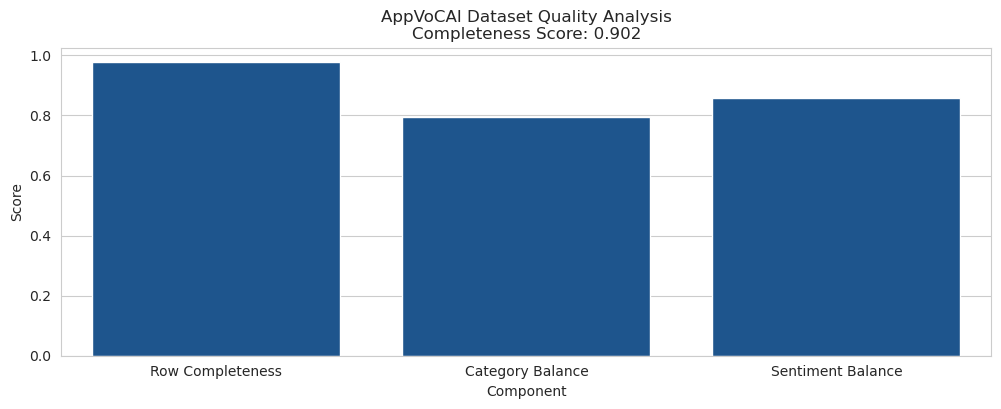

In [7]:
dqa.analyze_completeness()

The **completeness** breakdown shows high **Row Completeness**, with minimal missing data in reviews. Let's take a closer look at **Category Balance** and **Sentiment Balance**. 

#### Category Class Balance

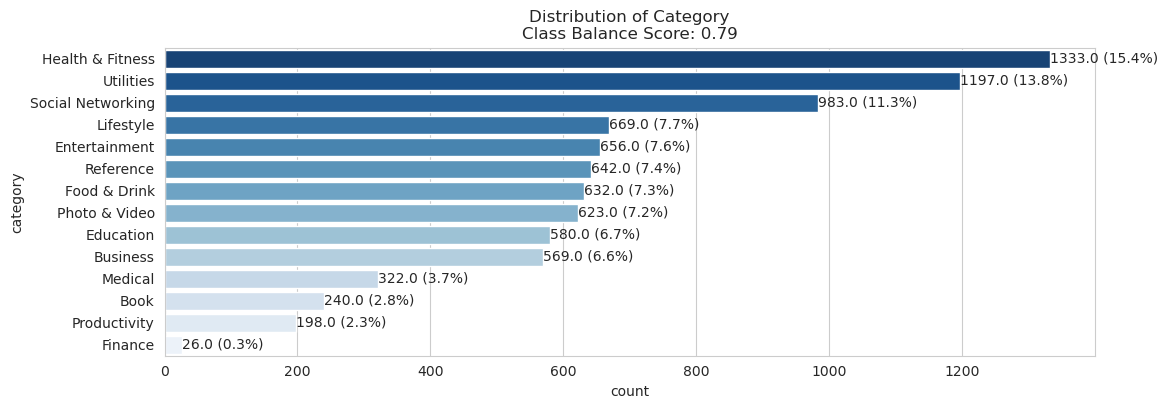

In [8]:
dqa.plot_category_class_balance()

The **Category Balance** distribution illustrates notable variability in representation across app categories. While some categories like "Health & Fitness" and "Utilities" dominate, others such as "Finance," "Productivity," and "Book" are significantly underrepresented. 

#### Sentiment Class Balance

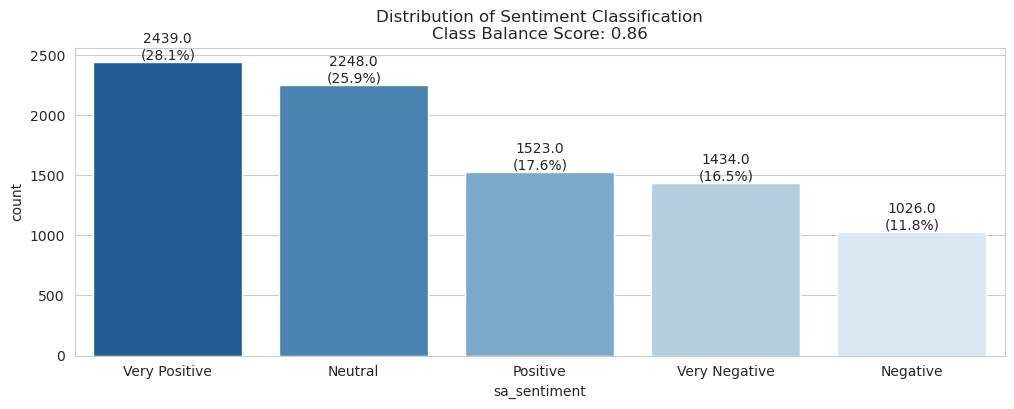

In [9]:
dqa.plot_sentiment_class_balance()

The **Sentiment Balance** distribution reveals a skew towards "Very Positive" and "Neutral" sentiments, with fewer "Negative" and "Very Negative" reviews. 

While **Category Balance** and **Sentiment Balance**  may bias sentiment analysis models, it is not a cleaning issue and can be addressed during pre-modeling with techniques such as class weighting, undersampling, or SMOTE. For now, this observation serves as a consideration for downstream tasks rather than immediate intervention.

### Data Validity

,Component,Score
0,Rating Validity,1.000000
1,Category Validity,1.000000
2,Review Date Validity,1.000000
3,Review Validity,0.819377


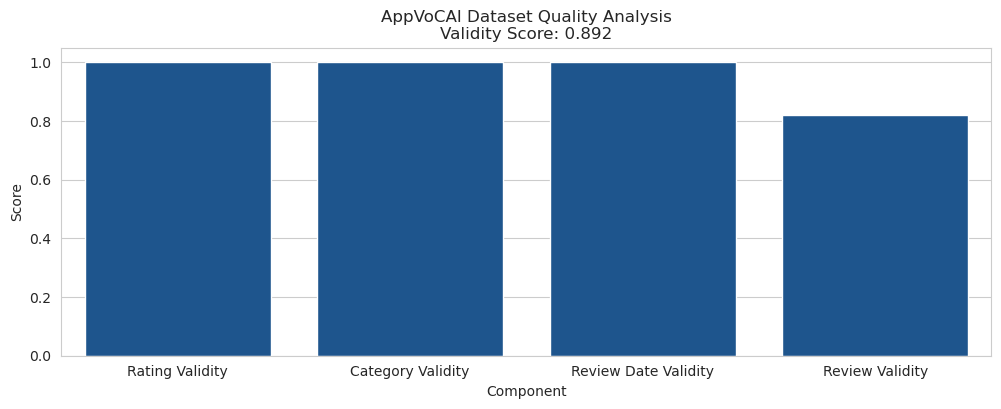

In [10]:
dqa.analyze_validity()

The **validity** scores reveal strong conformance to expected rules for **Rating**, **Category**, and **Review Date**, with all achieving perfect scores. However, **Review Validity** is significantly lower, indicating pervasive issues in the text quality of reviews. This likely reflects noise such as control characters, excessive special characters, elongation, non-ASCII content, accents, and embedded HTML. Let's take a closer look.

#### Review Validity

,Anomaly,Count,%
0,Validity Contains Excess Whitespace,1092,0.125952
1,Validity Contains Excess Character Repetition,333,0.038408
2,Validity Contains Elongation,303,0.034948
3,Validity Contains Excess Special Chars,240,0.027682
4,Validity Contains Accents,75,0.008651


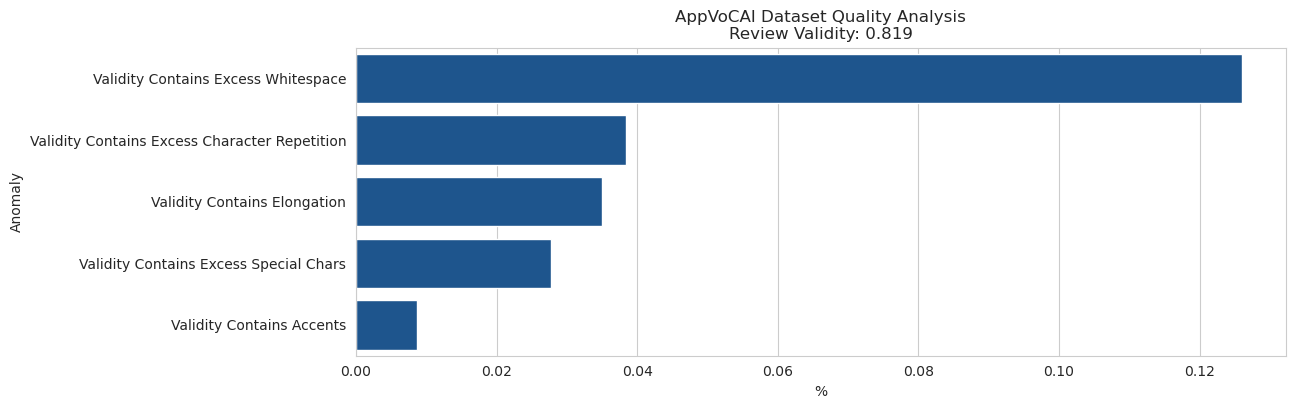

In [11]:
dqa.analyze_review_validity()

The **Review Validity** analysis highlights various forms of noise in the text, such as non-ASCII characters, excess whitespace, elongation, special characters, accents, control characters, and HTML artifacts. These issues reflect the presence of artifacts that do not carry meaningful information and can distort downstream text processing and analysis. Remediation efforts should prioritize removing or normalizing such noise to enhance the clarity and usability of the reviews while preserving the semantic integrity of the text.

### Data Relevance

,Component,Score
0,Language Relevance,0.941176
1,Review Length Relevance,0.942099


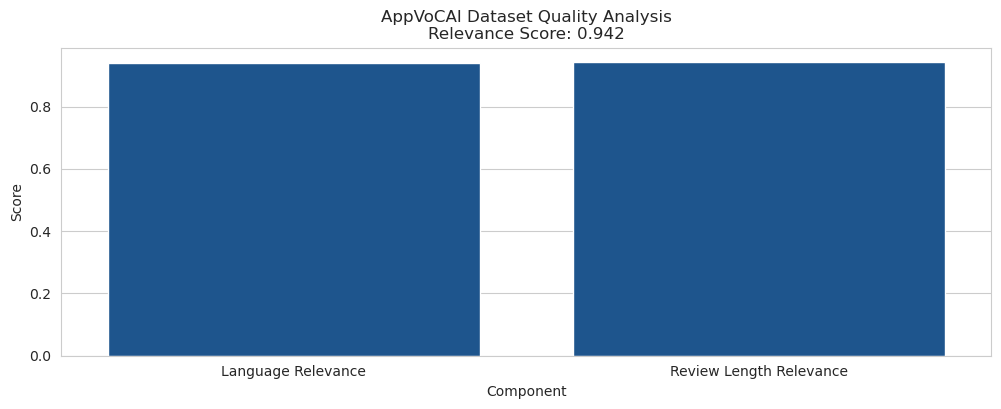

In [12]:
dqa.analyze_relevance()

The **Relevance** analysis focuses on ensuring that reviews are in English and meet a minimum length requirement. Both **Language Relevance** and **Review Length Relevance** scores are high, indicating that the majority of reviews meet these criteria. However, a small proportion of reviews fall short, potentially introducing irrelevant or low-quality data into the analysis. Addressing these issues by filtering out non-English reviews and excessively short reviews will ensure the dataset remains focused on meaningful and interpretable content.

### Data Uniqueness

,Component,Score
0,Row Uniqueness,1.0
1,Review Id Uniqueness,1.0
2,Review Uniqueness,1.0


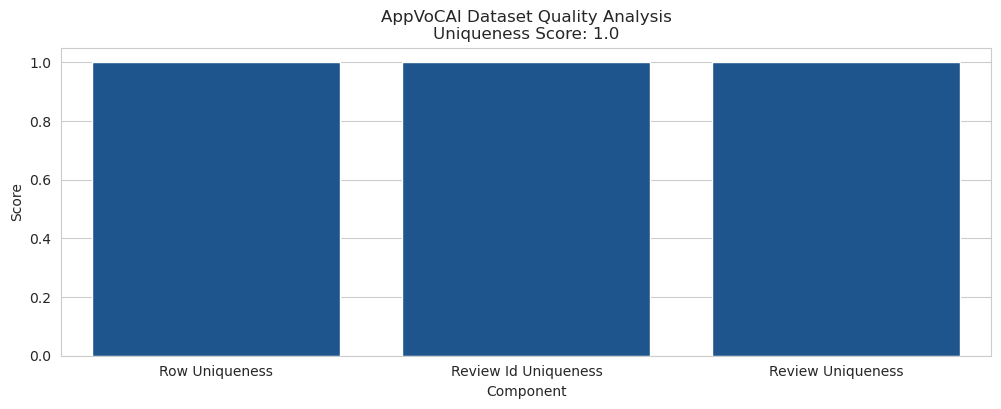

In [13]:
dqa.analyze_uniqueness()

The **Uniqueness** analysis shows strong overall performance. **Row Uniqueness** and **Review Uniqueness** are perfect, ensuring no duplicate rows or identical reviews exist in the dataset. However, **Review ID Uniqueness** is slightly below perfect, suggesting a small number of duplicate or reused identifiers. While this is a minor issue, it should be resolved to ensure accurate tracking and association of reviews with their metadata.

### Data Privacy

,Anomaly,Count,%
0,Privacy Contains Url,190,0.021915
1,Privacy Contains Phone,5,0.000577
2,Privacy Contains Email,0,0.000000


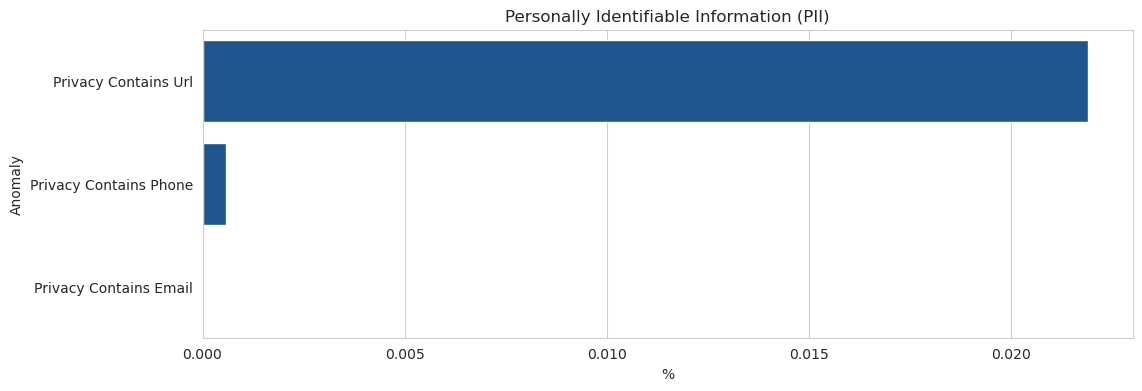

In [14]:
dqa.analyze_privacy()

The **Privacy** analysis indicates minimal violations of sensitive information; yet, remediation efforts should prioritize removal of URLs, email addresses and phone numbers identified.

## Data Cleaning Implications

- **Completeness**: Ensure removal of incomplete rows to maintain dataset integrity. Category and sentiment imbalance will be addressed during pre-modeling through techniques such as undersampling, class weighting, or SMOTE.
- **Validity**: Focus on eliminating textual noise, such as excessive special characters, elongation, and control characters, while retaining meaningful artifacts (e.g., emojis or domain-specific symbols) that contribute to the review's semantics.
- **Relevance**: Filter out non-English reviews and app names to ensure the dataset focuses on relevant content for analysis.
- **Uniqueness**: Remove duplicate review IDs to preserve data accuracy and consistency.
- **Privacy**: Strip URLs, phone numbers, and any other sensitive information to maintain compliance with privacy standards.

Next, we will implement these cleaning steps to prepare the dataset for downstream analysis and modeling.